The Portfolio's returns are: 5.82 % & and the Risk is: 42.32 %



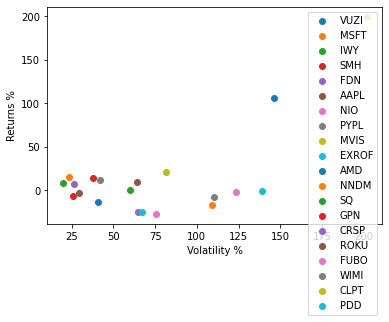

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas_datareader import data as web

def port_returns(r,period=252):
    total_returns = (r.iloc[-1]-r.iloc[0])/r.iloc[0]
    return round((total_returns*100),2)

def volatility_calculator(r,period=12):
    returns = r.pct_change()
    returns = returns.dropna()
    annual_volatility = returns.std()*np.sqrt(period)
    return round((annual_volatility*100),2)

stock_list = ['VUZI','MSFT','IWY','SMH','FDN','AAPL','NIO','PYPL','MVIS','EXROF','AMD','NNDM','SQ','GPN','CRSP',
             'ROKU','FUBO','WIMI','CLPT','PDD'] #Create a list of stocks that you want in your portfolio
stock_weight = np.array([0.04,0.06,0.03,0.05,0.05,0.06,0.07,0.07,0.02,0.03,0.05,0.05,0.04,0.05,0.04,0.04,0.05,0.04,0.05,0.06]) #Assign the weightage for the stocks.

my_stock = pd.DataFrame()

for element in stock_list: #Getting the stock 'Adj close' for the desired dates from Yahoo Finance
    my_stock[element] = web.DataReader(element, data_source='yahoo', start = '01-01-2021', end = '31-05-2021')['Adj Close']

my_returns = my_stock.aggregate(port_returns) #Calculate annualized returns by individual stock
my_volatility = my_stock.aggregate(volatility_calculator,period=252) #Calculate annualized volatility by individual stock

cov_matrix = my_stock.pct_change().cov()*252 #Covariance matrix = returns.cov() * 252 trading days

my_vol = np.sqrt(stock_weight.T @ cov_matrix @ stock_weight) #Weights transposed x cov matrix x weights (x is dot product; hence the @)
my_rets = stock_weight.T @ my_returns #Weight transposed x returns

print("The Portfolio's returns are:",round(my_rets,2),"% & and the Risk is:",round(my_vol*100,2),"%\n")

#Let's plot the returns and volatility of individual stocks in my portfolio

my_value = pd.DataFrame({"Returns": my_returns,"Volatility":my_volatility})

for ticker,row in my_value.iterrows(): #iterrows outputs a tuple with contents of the panda dataframe
    plt.scatter(row['Volatility'],row['Returns'],label=ticker) #Plotting as scatter plot to show index as legend
    
plt.xlabel('Volatility %')
plt.ylabel('Returns %')
plt.legend()
plt.show()